# Modelo de Distribuição de Bolsas de Monitoria

Este documento descreve o algoritmo utilizado para alocar bolsas de monitoria. O objetivo é priorizar componentes curriculares com maior demanda e importância estratégica, garantindo ao mesmo tempo a cobertura das atividades práticas.

O processo é dividido em duas fases principais:

1.  **Alocação de Bolsas de Prática:** Atende à necessidade operacional da carga horária prática.
2.  **Alocação de Bolsas Teóricas:** Distribui as bolsas restantes com base em um índice de prioridade, após garantir uma alocação mínima para componentes essenciais.


## Dados de Entrada

Para o cálculo, consideramos os seguintes dados:

*   $B_{\mathrm{total}}$: O número total de bolsas de monitoria disponíveis.
*   Para cada **componente curricular $c$**:
    *   $p_{\mathrm{matriculados}}(c)$: Proporção de alunos matriculados no componente.
    *   $p_{\mathrm{ch\_teorica}}(c)$: Proporção da carga horária teórica do componente.
    *   $p_{\mathrm{obrigatorio}}(c)$: Nível de obrigatoriedade do componente.
    *   $p_{\mathrm{pre\_requisito}}(c)$: Importância do componente como pré-requisito para outros.
    *   $\mathrm{CH}_{\mathrm{pratica}}(c)$: A carga horária prática total do componente.
    *   $p_{\mathrm{forca\_trabalho}}(c)$: Proporção de professores da área temática responsável pelo componente.

## O Algoritmo de Alocação (Passo a Passo)

O cálculo para cada componente $c$ segue a sequência abaixo.

### Passo 1: Alocação de Bolsas de Prática

Primeiro, alocamos as bolsas necessárias para cobrir as aulas práticas.

1.  **Cálculo da Necessidade Inicial:** Para cada componente $c$, calculamos o número de monitores necessários, arredondando para cima. Usamos uma carga horária máxima de $\mathrm{CH}_{\mathrm{max}} = 600$ horas anuais por monitor.
    $$
    B_{\mathrm{pratica}}(c) = \left\lceil \frac{\mathrm{CH}_{\mathrm{pratica}}(c)}{\mathrm{CH}_{\mathrm{max}}} \right\rceil
    $$

2.  **Verificação de Disponibilidade:** Somamos a necessidade de todos os componentes: $B_{\mathrm{pratica, total}} = \sum_{c} B_{\mathrm{pratica}}(c)$.

3.  **Ajuste (se necessário):**
    *   **Se $B_{\mathrm{pratica, total}} \le B_{\mathrm{total}}$**, cada componente recebe o valor $B_{\mathrm{pratica}}(c)$.
    *   **Se $B_{\mathrm{pratica, total}} > B_{\mathrm{total}}$**, não há bolsas suficientes. Neste caso, as $B_{\mathrm{total}}$ são distribuídas proporcionalmente entre os componentes que necessitam, usando o método de alocação de Hamilton para garantir números inteiros e uma distribuição justa.

O resultado desta etapa é o valor **$B_{\mathrm{pratica, final}}(c)$** para cada componente.

### Passo 2: Cálculo do Índice de Prioridade (IP)

Para distribuir as bolsas restantes (teóricas), criamos um **Índice de Prioridade (IP)** que mede a demanda e a importância de cada componente.

1.  **Fórmula do IP:** O índice para um componente $c$ é calculado como:
    $$
    \mathrm{IP}(c) = \frac{ p_{\mathrm{matriculados}}(c) \cdot p_{\mathrm{ch\_teorica}}(c) \cdot (1 + p_{\mathrm{obrigatorio}}(c)) \cdot (1 + p_{\mathrm{pre\_requisito}}(c)) }{ p_{\mathrm{forca\_trabalho}}(c) }
    $$
    > *Intuitivamente, este índice valoriza componentes com **mais alunos**, **maior carga horária teórica**, que são **obrigatórios** e que servem de **pré-requisito** para muitos outros. Ele é penalizado pela força de trabalho da área, priorizando áreas onde a demanda de alunos é alta em relação ao número de professores.*

2.  **Normalização:** Para usar o IP em uma distribuição, nós o normalizamos para que a soma de todos os índices seja 1.
    $$
    \widetilde{\mathrm{IP}}(c) = \frac{\mathrm{IP}(c)}{\sum_{i} \mathrm{IP}(c_i)}
    $$

### Passo 3: Alocação de Bolsas Teóricas

Agora, distribuímos as bolsas que não foram usadas na etapa de prática.

1.  **Definição do Saldo de Bolsas:**
    $$
    B_{\mathrm{remanescentes}} = B_{\mathrm{total}} - \sum_{c} B_{\mathrm{pratica, final}}(c)
    $$

2.  **Alocação Mínima para Componentes Obrigatórios:** Antes da distribuição proporcional, é garantido que cada **componente obrigatório do ciclo geralista** receba pelo menos uma bolsa teórica, desde que haja bolsas remanescentes suficientes para isso. Essas bolsas são pré-alocadas e o saldo é atualizado.
    $$
    B_{\mathrm{teoricas, disp}} = B_{\mathrm{remanescentes}} - (\text{bolsas alocadas para obrigatórios})
    $$

3.  **Distribuição Proporcional:** O novo saldo de bolsas teóricas ($B_{\mathrm{teoricas, disp}}$) é então alocado usando o $\widetilde{\mathrm{IP}}(c)$. Primeiro, calculamos uma "alocação ideal" que pode conter frações.
    $$
    A_{\mathrm{ideal}}(c) = \widetilde{\mathrm{IP}}(c) \cdot B_{\mathrm{teoricas, disp}}
    $$

4.  **Atribuição de Bolsas Inteiras (Método de Hamilton):**
    *   Cada componente $c$ recebe inicialmente a **parte inteira** da sua alocação ideal: $A_{\mathrm{base}}(c) = \lfloor A_{\mathrm{ideal}}(c) \rfloor$.
    *   As bolsas que sobram (devido ao arredondamento) são distribuídas, uma a uma, para os componentes que tiveram as **maiores partes fracionárias** no cálculo da $A_{\mathrm{ideal}}(c)$.

O resultado desta etapa é o valor **$B_{\mathrm{teoricas, final}}(c)$**, que inclui tanto a bolsa mínima para os obrigatórios quanto as distribuídas pelo IP.

### Passo 4: Total de Bolsas por Componente

A alocação final para cada componente é a soma das bolsas obtidas em cada etapa.

$$
B_{\mathrm{final}}(c) = B_{\mathrm{pratica, final}}(c) + B_{\mathrm{teoricas, final}}(c)
$$


## Agregação por Câmara Temática

Após a alocação por componente estar completa, os resultados são agrupados por área para uma visão geral.

Para cada **câmara temática $g$**, o total de bolsas é simplesmente a soma das bolsas de todos os componentes que pertencem a ela.
$$
B_{\mathrm{final}}(g) = \sum_{c \in g} B_{\mathrm{final}}(c)
$$

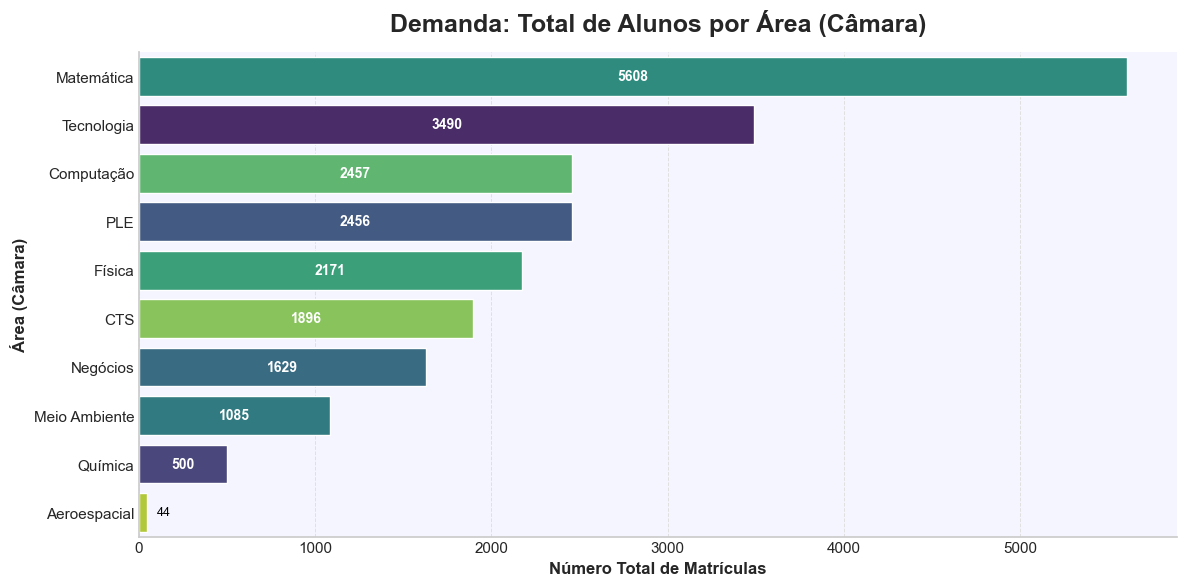

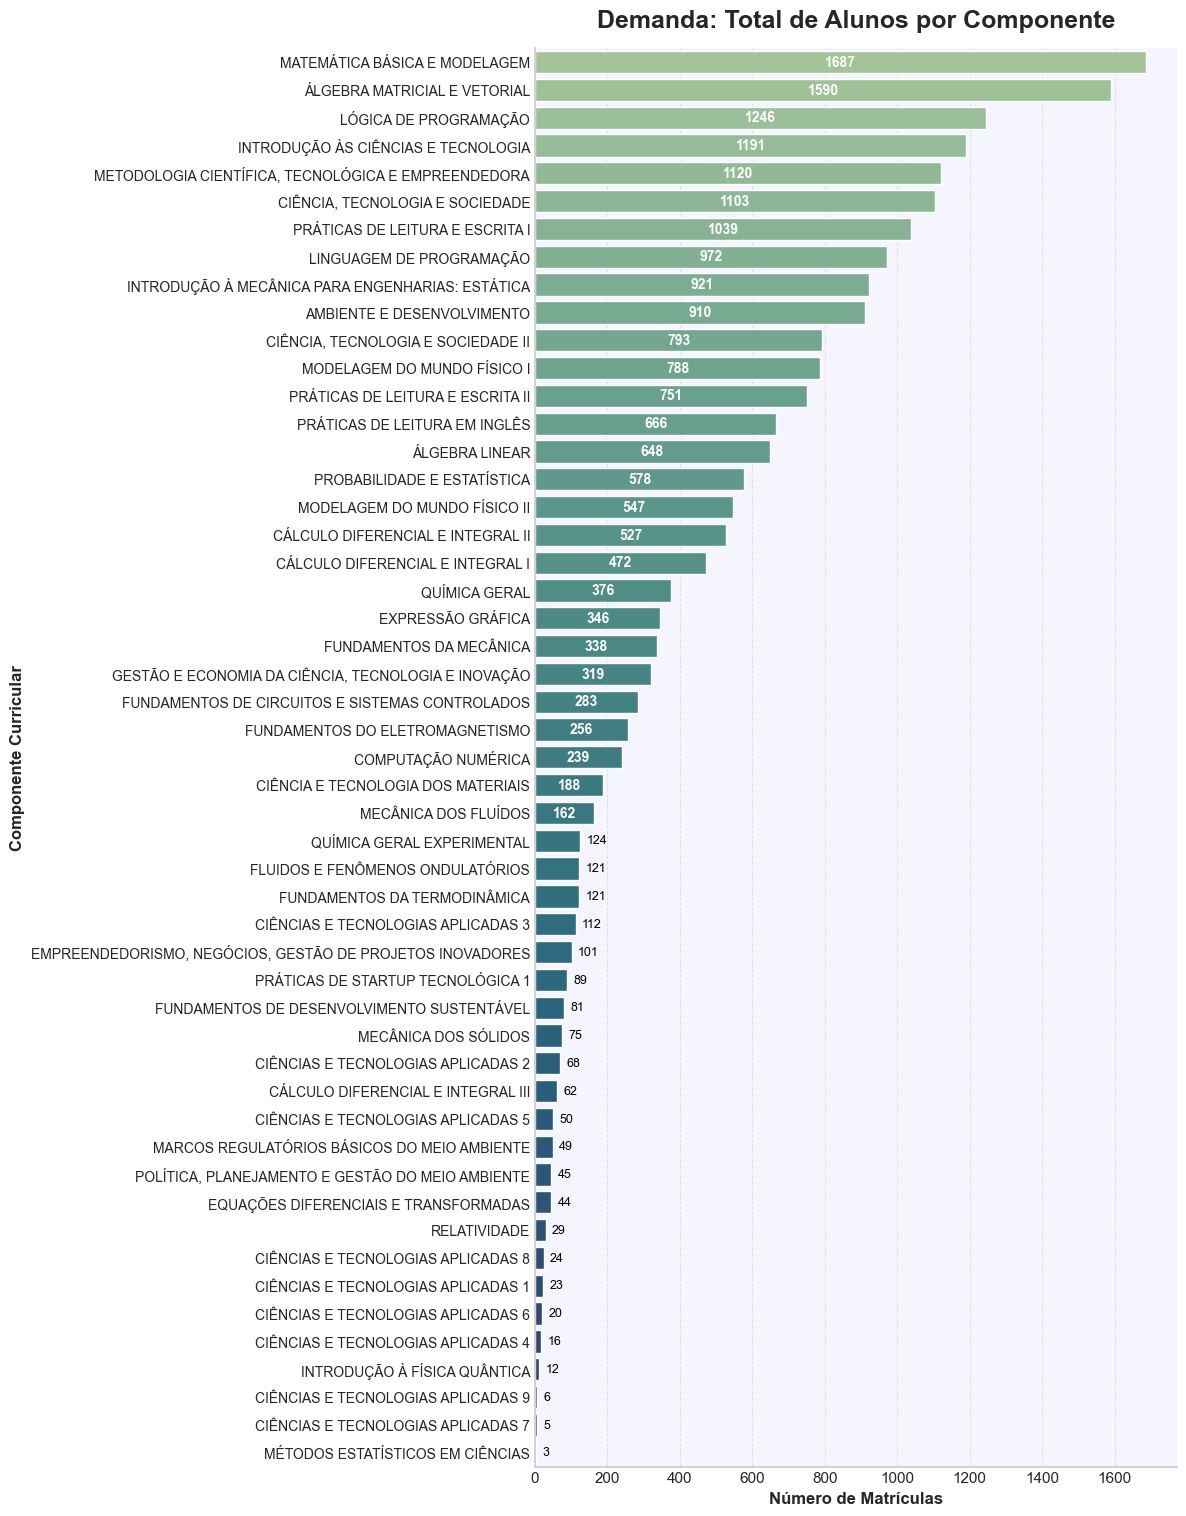

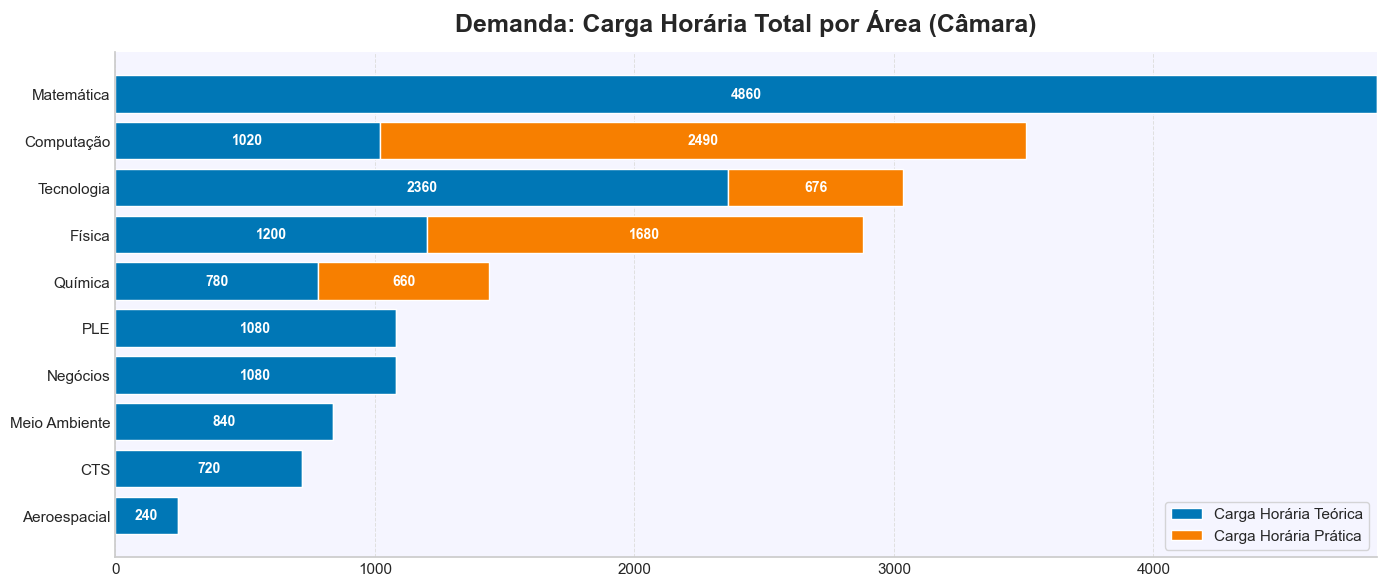

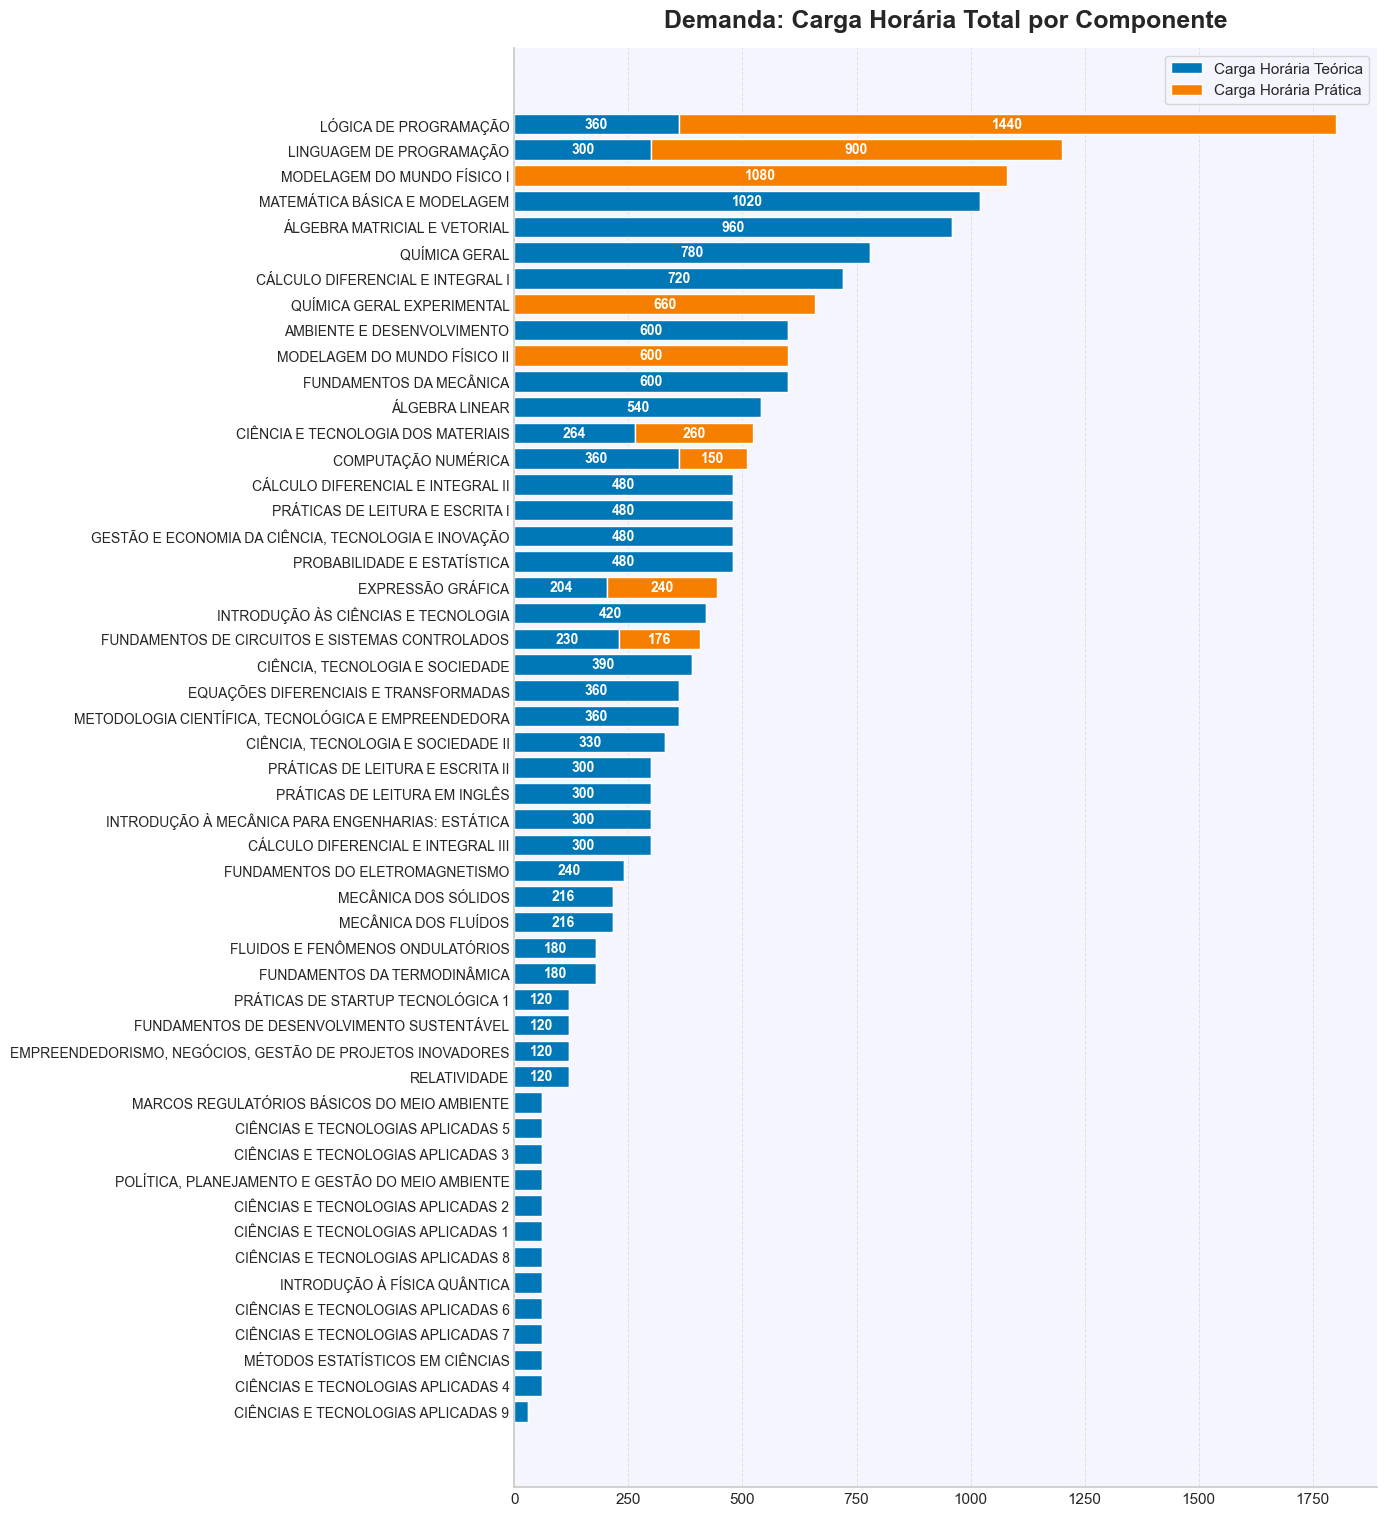

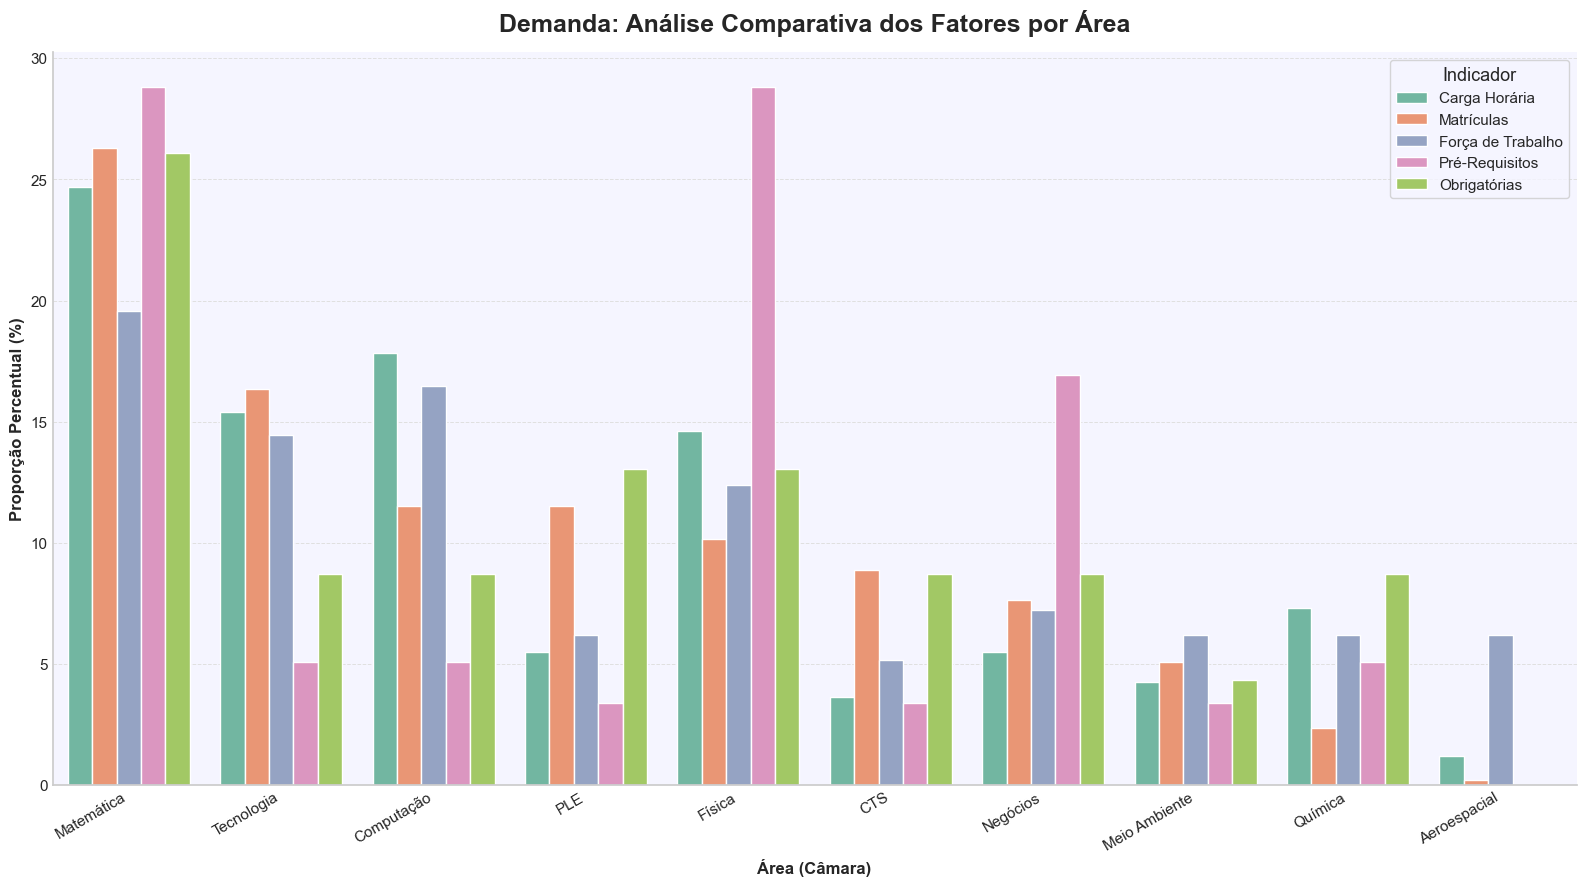

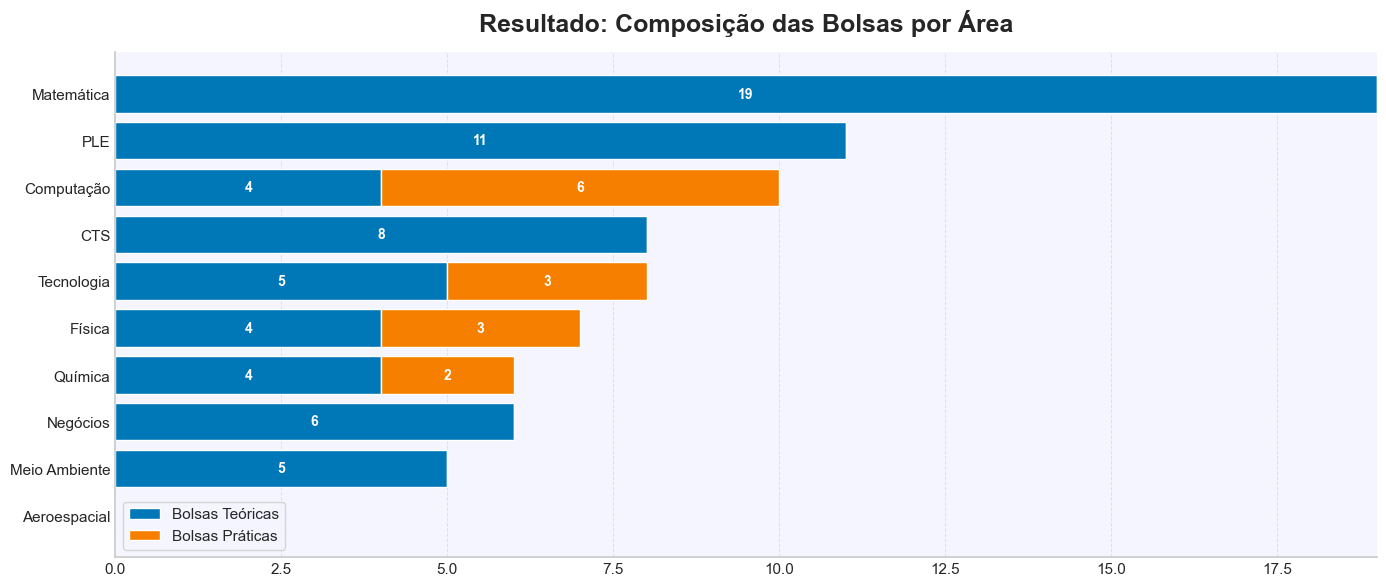

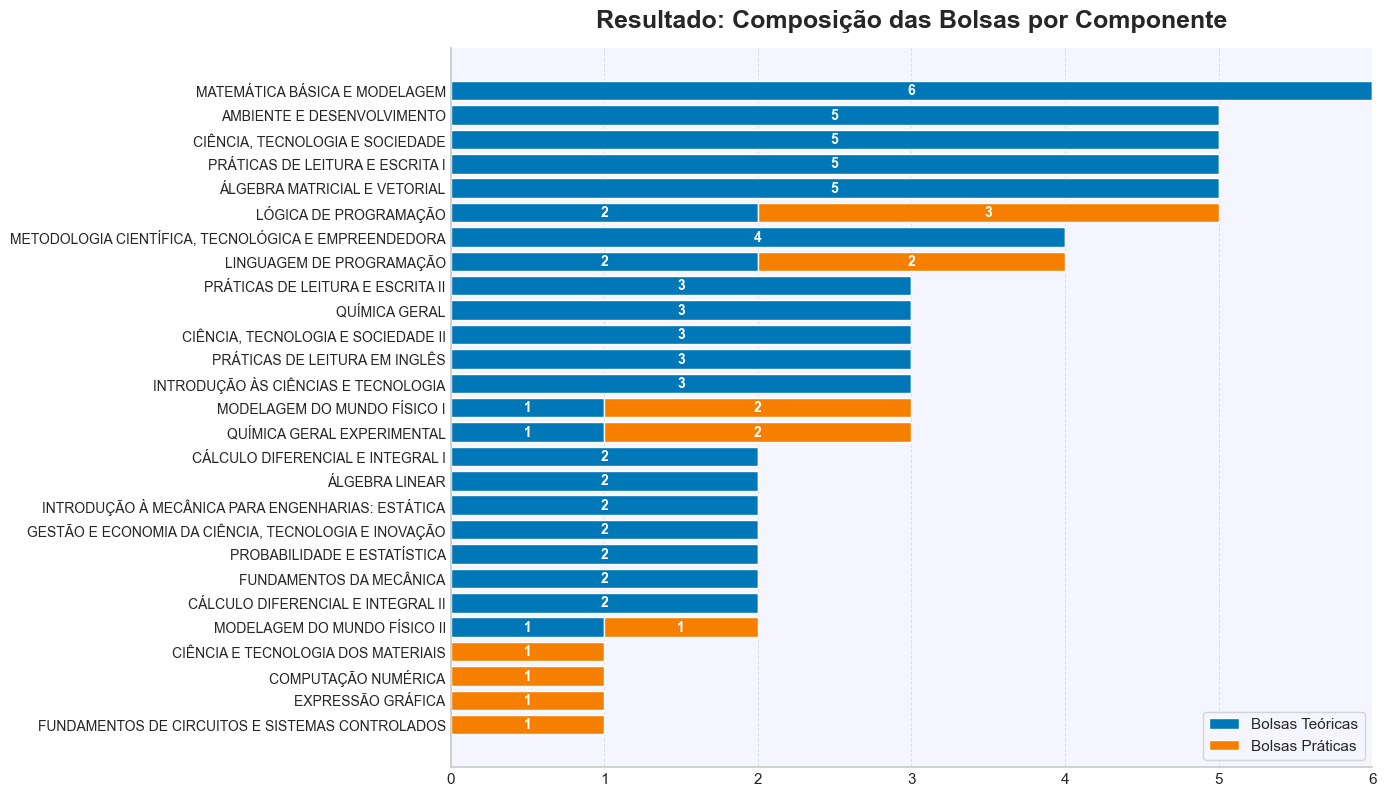

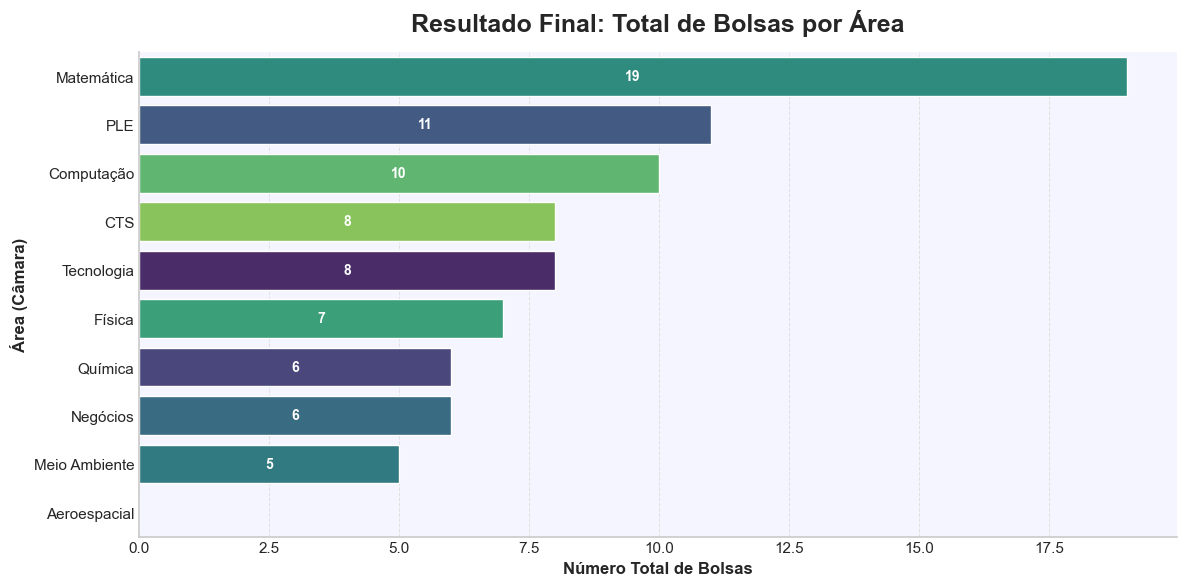

In [1]:
from src.sim import Simulator
from src.data_loaders import Data
from src.sim import Indexes
from src.plotter import generate_all_simulation_visualizations

data = Data(
    curriculum_file_path="data/cleaned/study2/curriculo.xlsx",
    demand_file_path="data/cleaned/study2/demanda.xlsx",
    camaras_file_path="data/cleaned/study2/camaras.xlsx"
)

s = Simulator(data)

df_component = s.simulate_by_component_and_practice(
    Indexes.IP_TEORICA,
    total=80,
    min_by_compulsory=1,
    xlsx_output_file="results/study2/bolsas_por_componente.xlsx"
)

df_area = s.simulate_by_area_and_practice(
    Indexes.IP_TEORICA,
    total=80,
    min_by_compulsory=1,
    xlsx_output_file="results/study2/bolsas_por_camara.xlsx"
)

data.get_demand_by_component().to_excel('teste.xlsx')

generate_all_simulation_visualizations(df_component, df_area)